# **Web scraping con Python**


#### *Material complementario a la clase dictada por [Gustavo Juantorena](https://github.com/GEJ1) como docente invitado en la materia <b>Text Mining</b> de la  [Maestría en Explotación de Datos y Descubrimiento de Conocimiento](http://datamining.dc.uba.ar/datamining/) de la Universidad de Buenos Aires.*
#### [Slides de la clase](https://docs.google.com/presentation/d/10-lc2Y6kMVHp7FO9v8ReZdY1MPwUlgxWIsSDePY0afg/edit?usp=sharing)

*Las partes del código que no son mias tienen las atribuciones correspondientes*

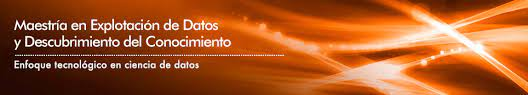

### **Importante**: Los cambios que hagan en este cuaderno de Colab no se guardarán, lo ideal sería que hagan una copia del mismo en sus respectivos Google Drives de la siguiente forma:

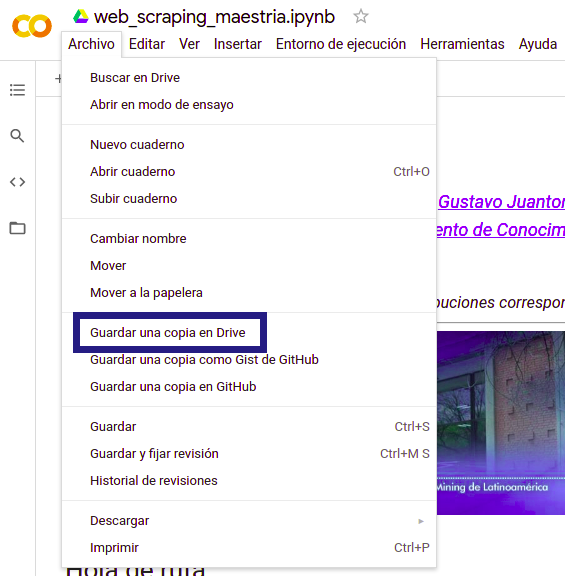

# **Hoja de ruta**


## 1. Pedidos HTTP con **urllib** y **Requests**
## 2. Uso basico de **APIs** 
## 3. Parseo con **Beautiful Soup**
## 4. Intro al web scraping avanzado con **Selenium**






# **Pedidos HTTP con urllib y Requests**

In [ ]:
# Para hacer pedidos mediante el protocolo HTTP 
import requests

In [ ]:
# Hacemos un pedido a la página de wikipedia
URL = 'https://www.wikipedia.org'

# Guardamos el objeto que nos devuelve
response = requests.get(URL) 

print(f'Tipo de Objeto: {type(response)} \n')
print(f'Status code: {response.status_code} \n') 
print(f'Data: {response.content} \n') 

Tipo de Objeto: <class 'requests.models.Response'> 

Status code: 200 

Data: b'<!DOCTYPE html>\n<html lang="en" class="no-js">\n<head>\n<meta charset="utf-8">\n<title>Wikipedia</title>\n<meta name="description" content="Wikipedia is a free online encyclopedia, created and edited by volunteers around the world and hosted by the Wikimedia Foundation.">\n<script>\ndocument.documentElement.className = document.documentElement.className.replace( /(^|\\s)no-js(\\s|$)/, "$1js-enabled$2" );\n</script>\n<meta name="viewport" content="initial-scale=1,user-scalable=yes">\n<link rel="apple-touch-icon" href="/static/apple-touch/wikipedia.png">\n<link rel="shortcut icon" href="/static/favicon/wikipedia.ico">\n<link rel="license" href="//creativecommons.org/licenses/by-sa/3.0/">\n<style>\n.sprite{background-image:linear-gradient(transparent,transparent),url(portal/wikipedia.org/assets/img/sprite-e99844f6.svg);background-repeat:no-repeat;display:inline-block;vertical-align:middle}.svg-Commons-logo_si

## También podemos usar la libreria Requests

### Ejemplo de scrapeo de imágenes

In [ ]:
# Importamos
import requests

# defino la URL
image_url = 'https://www.octoparse.com/media/7179/find-data.jpg'

# Hago una peticion y guardo la respuesta
image_response = requests.get(image_url)

# Accedemos al contenido de la imagen en bytes
image_response_content = image_response.content

print(f'Este es el contenido en bytes: \n {image_response_content}')

Este es el contenido en bytes: 
 b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x07\x08\x07\x06\n\x08\x08\x08\x0b\n\n\x0b\x0e\x18\x10\x0e\r\r\x0e\x1d\x15\x16\x11\x18#\x1f%$"\x1f"!&+7/&)4)!"0A149;>>>%.DIC<H7=>;\xff\xdb\x00C\x01\n\x0b\x0b\x0e\r\x0e\x1c\x10\x10\x1c;("(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc2\x00\x11\x08\x01\x90\x02&\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x01\x04\x03\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x05\x04\x06\x07\x08\xff\xc4\x00\x19\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x00\xd2\xf9D\x11\x01u\xa0L\xe4\x12\r\x81!\xcc\x82*\x88\x80\xaa\x82\x8b\x04\x89\xd0\xb0\x0b\x04\n\xa1\xa8\xb8\x1a\x8bJ$9\xa2\x80\x0c\x85h\x0bt\x90L\x82\x056h\nA\xb3H+(*\xa0\xa2\r\x01\x11\x04i\x08\xab9\x90TD\xc3\xba\x86\xb2\x11\x84BQ\x00R\x0e\x84\n\xca1a\xe5\x8ePi\x86\x85-\xa0\x99\x8a

Esta imagen la bajamos de internet usando Python! 
 


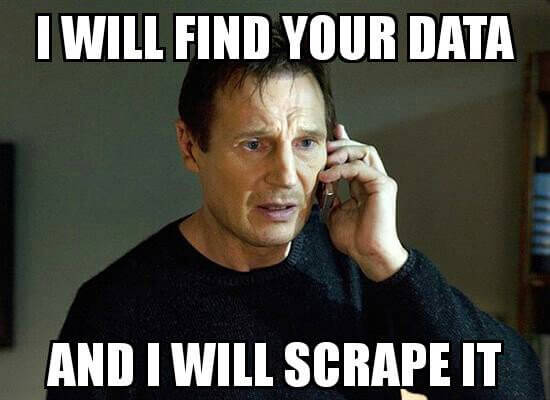

In [ ]:
# Importamos librerias para manejar imagenes (no tienen nada que ver con el scrapeo)
from PIL import Image
from io import BytesIO

# Mostramos la imagen
image_from_url = Image.open(BytesIO(image_response_content))
print('Esta imagen la bajamos de internet usando Python! \n ')
image_from_url

In [ ]:
# Para guardarla
image_from_url.save("image_from_url.png","PNG")

### Headers

breve comentario, puede llegar a ser útil

In [ ]:
# Una serie de datos que acompanan al pedido. Para saber mas: https://developer.mozilla.org/en-US/docs/Web/HTTP/Headers

url = 'https://exactas.uba.ar/'

headers = {
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0' # User-Agent da info del sistema operativo, el navegador usado, etc
    }
response = requests.get(url, headers=headers)

# **Uso basico de APIs** 

### Uso de API de manera directa

[Sunset and sunrise times API](https://sunrise-sunset.org/api)

**Sirve para obtener la hora del amanecer y el ocaso de un determinado día**

*Parametetros:*


*  **lat** (float): Latitude in decimal degrees. Required.
*  **lng** (float): Longitude in decimal degrees. Required.
*  **date** (string): Date in YYYY-MM-DD format. Also accepts other date formats   and even relative date formats. If not present, date defaults to current date. Optional.
* **callback** (string): Callback function name for JSONP response. Optional.
* **formatted** (integer): 0 or 1 (1 is default). Time values in response will be expressed following ISO 8601 and day_length will be expressed in seconds. Optional.

*Estructura de la query:*

`https://api.sunrise-sunset.org/json?`

`lat=36.7201600`

`&`

`lng=-4.4203400`

`&`

`date=2021-07-26`

In [ ]:
# Definimos los parametros de nuestra query
latitud = -34.6
longitud = -58.4
fecha = '1912-12-23' # YYYY-MM-DD

In [ ]:
# Hacemos el pedido y guardamos la respuesta en una nueva variable  
response_sunset = requests.get(f'https://api.sunrise-sunset.org/json?lat={latitud}&lng={longitud}&date={fecha}', verify=False)

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [ ]:
# Para des-serializar el objeto (que era tipo 'HTTPResponse') y cargarlo como json
data_sunset = response_sunset.json() 
data_sunset

{'results': {'sunrise': '8:37:04 AM',
  'sunset': '11:08:37 PM',
  'solar_noon': '3:52:50 PM',
  'day_length': '14:31:33',
  'civil_twilight_begin': '8:09:03 AM',
  'civil_twilight_end': '11:36:38 PM',
  'nautical_twilight_begin': '7:32:36 AM',
  'nautical_twilight_end': '12:13:05 AM',
  'astronomical_twilight_begin': '6:52:27 AM',
  'astronomical_twilight_end': '12:53:14 AM'},
 'status': 'OK'}

In [ ]:
#Evaluamos el status del pedido
sunset_status = data_sunset['status']
print(f'Status: {sunset_status} \n')

Status: OK 



In [ ]:
# Podemos ver su contenido como si fuera un diccionario:
sunset = data_sunset['results']['sunset']
print(f'El {fecha} el sol se puso a las {sunset} (UTC)\n')

El 1912-12-23 el sol se puso a las 11:08:37 PM (UTC)



In [ ]:
# tambien podriamos iterar
print("Iterando data_sunset['results']: \n")
for elemento in data_sunset['results']:
  print(elemento)

Iterando data_sunset['results']: 

sunrise
sunset
solar_noon
day_length
civil_twilight_begin
civil_twilight_end
nautical_twilight_begin
nautical_twilight_end
astronomical_twilight_begin
astronomical_twilight_end


### Uso de API por medio de una librería: Wikipedia

Wikipedia-API es un wrapper de Python fácil de usar para la API de Wikipedia. Admite la extracción de textos, secciones, enlaces, categorías, traducciones, etc. 

Repositorio: https://github.com/martin-majlis/Wikipedia-API

Documentación: https://wikipedia-api.readthedocs.io/en/latest/README.html






In [ ]:
# Instalamos el paquete porque no viene con Colab
!pip3 install wikipedia-api -q

In [ ]:
# Ahora si podemos importarlo
import wikipediaapi

In [ ]:
# Instanciamos la clase wikipediaapi y utilizamos el metodo Wikipedia con el parametro de idioma
wiki_wiki = wikipediaapi.Wikipedia('es')

# Usamos el metodo page para y hacemos un pedido con una keyword
page_data_mining = wiki_wiki.page('Minería_de_datos')

print(f'page_data_mining es un objeto de tipo: \n \n{type(page_data_mining)}')

page_data_mining es un objeto de tipo: 
 
<class 'wikipediaapi.WikipediaPage'>


In [ ]:
# Resumen
page_data_mining.summary

'La minería de datos o exploración de datos (es la etapa de análisis de "knowledge discovery in databases" o KDD) es un campo de la estadística y las ciencias de la computación referido al proceso que intenta descubrir patrones en grandes volúmenes de conjuntos de datos.[1]\u200b[2]\u200b  Utiliza los métodos de la inteligencia artificial, aprendizaje automático, estadística y sistemas de bases de datos. El objetivo general del proceso de minería de datos consiste en extraer información de un conjunto de datos y transformarla en una estructura comprensible para su uso posterior. Además de la etapa de análisis en bruto, supone aspectos de gestión de datos y de bases de datos, de procesamiento de datos, del modelo y de las consideraciones de inferencia, de métricas de intereses, de consideraciones de la teoría de la complejidad computacional, de post-procesamiento de las estructuras descubiertas, de la visualización y de la actualización en línea.\nEl término es un concepto de moda, y es

In [ ]:
# Url completa
page_data_mining.fullurl

'https://es.wikipedia.org/wiki/Miner%C3%ADa_de_datos'

In [ ]:
# Imprimir las categorias a las que corresponde la pagina con el atributo 'categories' 


categories = page_data_mining.categories
for title in sorted(categories.keys()):
    print("%s: %s" % (title, categories[title]))

Categoría:Análisis de datos: Categoría:Análisis de datos (id: ??, ns: 14)
Categoría:Bases de datos: Categoría:Bases de datos (id: ??, ns: 14)
Categoría:Minería de datos: Categoría:Minería de datos (id: ??, ns: 14)
Categoría:Wikipedia:Artículos con identificadores GND: Categoría:Wikipedia:Artículos con identificadores GND (id: ??, ns: 14)
Categoría:Wikipedia:Artículos con identificadores LCCN: Categoría:Wikipedia:Artículos con identificadores LCCN (id: ??, ns: 14)
Categoría:Wikipedia:Artículos que necesitan referencias adicionales: Categoría:Wikipedia:Artículos que necesitan referencias adicionales (id: ??, ns: 14)
Categoría:Wikipedia:Páginas con enlaces mágicos de ISBN: Categoría:Wikipedia:Páginas con enlaces mágicos de ISBN (id: ??, ns: 14)
Categoría:Wikipedia:Referenciar (aún sin clasificar): Categoría:Wikipedia:Referenciar (aún sin clasificar) (id: ??, ns: 14)


In [ ]:
def print_categorymembers(categorymembers, level=0, max_level=1):
        for c in categorymembers.values():
            print("%s: %s (ns: %d)" % ("*" * (level + 1), c.title, c.ns))
            if c.ns == wikipediaapi.Namespace.CATEGORY and level < max_level:
                print_categorymembers(c.categorymembers, level=level + 1, max_level=max_level)


cat = wiki_wiki.page("Categoría:Análisis de datos")
# print("Category members: Category:Physics")
print_categorymembers(cat.categorymembers)

# **BeautifulSoup**

## Generalidades

In [ ]:
from bs4 import BeautifulSoup
import requests

# Vamos a jugar un poco con la pagina de Exactas
url_base = 'https://exactas.uba.ar/'
endpoint_calendario = 'calendario-academico/'
html_obtenido = requests.get(url_base+endpoint_calendario)
soup = BeautifulSoup(html_obtenido.text, "html.parser")
print(type(soup))
print(soup)
print(soup.prettify())

In [ ]:
# Si queremos quedarnos con un tag
# El método "find" busca el primer elemento de la pagina con ese tag
primer_h3 = soup.find('h3')
# print(primer_h3)

# equivalente a:
print(soup.h3.text)

INSCRIPCIÓN PRIMER CUATRIMESTRE 2022


In [ ]:
# El método "find_all" busca TODOS los elementos de la pagina con ese tag y devuelve una lista que los contiene (en realidad devuelve un objeto de la clase "bs4.element.ResultSet")
h3_todos = soup.find_all('h3')
# print(h3_todos)

# Si usamos el parametro limit = 1, emulamos al metodo find:
h3_uno_solo = soup.find_all('h3',limit=1)
print(h3_uno_solo)

[<h3>INSCRIPCIÓN PRIMER CUATRIMESTRE 2022</h3>]


In [ ]:
# podemos iterar sobre el objeto
for fecha in h3_todos[:-1]:
  # Extraemos el texto que se encuentra dentro del tag
  print(fecha.text)

INSCRIPCIÓN PRIMER CUATRIMESTRE 2022
EXÁMENES DE FEBRERO-MARZO 2022
PRIMER BIMESTRE 2022 (8 semanas)
SEGUNDO BIMESTRE 2022 (8 semanas)
INSCRIPCIÓN SEGUNDO CUATRIMESTRE 2022
INSCRIPCIÓN A DOCTORADO 2022
SEMANAS DE LAS CIENCIAS
ACTOS DE COLACIÓN DE GRADO Y POSGRADO
FERIADOS


In [ ]:
# Busco por clase, escribo class_ porque "class" es una palabra reservada en Python
eventos_proximos = soup.find('aside', class_ = 'widget_my_calendar_upcoming_widget')
for evento in eventos_proximos:
  print(evento.text)

Agenda →

17 agosto, 2022,  : Becas de Formación de recursos humanos en Ciencias de la Atmósfera  | + INFO
17 agosto, 2022,  : Becas de Formación de recursos humanos en Oceanografía  | + INFO
17 agosto, 2022,  : Remotos y su aplicación en Geología  | + INFO
17 agosto, 2022, 13.00: Reunión sobre "Los espacios para la investigación con animales no tradicionales"  | + INFO
17 agosto, 2022, 13.00: Seminario "Joint fluctuations of current and occupation time for the exclusion process out of equilibrium"  | + INFO
18 agosto, 2022 – 22 septiembre, 2022, 15.00: Ciclo presencial de charlas de carrera  | + INFO



In [ ]:
# Todos los links. Esto podría ser útil para seguir scrapeando todo el sitio haciendo requests en ellos
a_todos = soup.find_all('a', href=True)
for a in a_todos:
  print(f"{a.text}: {a['href']}")

Conocé Exactas: https://exactas.uba.ar/institucional/la-facultad/
Carreras de Grado: https://exactas.uba.ar/ensenanza/carreras-de-grado/
Carreras de Posgrado: https://exactas.uba.ar/ensenanza/carreras-de-posgrado/
Cursos de Posgrado: https://exactas.uba.ar/ensenanza/cursos-de-posgrado/
Estudiantes extranjeros: https://exactas.uba.ar/informacion-para-estudiantes-extranjeros/
Orientación Vocacional: https://exactas.uba.ar/extension/ov/
Becas para estudio: https://exactas.uba.ar/becas-para-estudio/
Carreras de Grado: https://exactas.uba.ar/ensenanza/carreras-de-grado/
Calendario Académico: https://exactas.uba.ar/calendario-academico/
Trámites a distancia: https://exactas.uba.ar/tramites-a-distancia/
Inscripción de ingresantes: https://exactas.uba.ar/inscripcion-ingresantes/
Inscripción a materias: http://inscripciones.exactas.uba.ar/exactas/
Programa de Ingresantes: https://exactas.uba.ar/cbc/
Becas para estudio: https://exactas.uba.ar/becas-para-estudio/
Becas de Investigación: https://e

In [ ]:
# Podemos tambien scrapear un tabla y traernos los feriados
tabla_feriados = soup.find_all('td')

# Con 'attr' podemos acceder a cualquier atributo de a etiqueta usando un diccionario
dias = soup.find_all('td', attrs={'style':'width: 8.88383%; height: 56px;'}) 
fechas = soup.find_all('td', attrs={'style':'width: 14.8064%; height: 56px;'}) 
eventos = soup.find_all('td', attrs={'style':'width: 48.6333%; height: 56px;'}) 
# print(tabla_feriados)

for pos in range(len(dias)):
  print(f" Dia: {dias[pos].text.strip()} | fecha: {fechas[pos].text.strip()} | evento: {eventos[pos].text.strip()} ")

 Dia: Sábado | fecha: 1 de enero | evento: Año Nuevo 
 Dia: Lunes | fecha: 28 de febrero | evento: Carnaval 
 Dia: Martes | fecha: 1 de marzo | evento: Carnaval 
 Dia: Jueves | fecha: 24 de marzo | evento: Día Nacional de la Memoria por la Verdad y la Justicia 
 Dia: Jueves | fecha: 14 de abril | evento: Jueves Santo 
 Dia: Viernes | fecha: 15 de abril | evento: Viernes Santo 
 Dia: Domingo | fecha: 1 de mayo | evento: Día del Trabajador 
 Dia: Miércoles | fecha: 25 de mayo | evento: Día de la Revolución de Mayo 
 Dia: Viernes | fecha: 17 de junio | evento: Paso a la Inmortalidad del General Güemes 
 Dia: Lunes | fecha: 20 de junio | evento: Paso a la Inmortalidad del General Belgrano 
 Dia: Sábado | fecha: 9 de julio | evento: Día de la Independencia 
 Dia:  | fecha:  | evento: Fiesta del Sacrificio 
 Dia: Lunes | fecha: 15 de agosto | evento: Paso a la Inmortalidad del General San Martín 
 Dia:  | fecha:  | evento: Año Nuevo Judío 
 Dia:  | fecha:  | evento: Día del Perdón 
 Dia: Mar

In [ ]:
# Última actualización

# No es necesario todo este choclo de selector, hubiera alcanzado con #post-256
ultima_actualizacion = soup.select('#post-256 > div.entry-content > p:nth-of-type(1)') 
ultima_actualizacion= ultima_actualizacion[0].text

# print(ultima_actualizacion)

# Para exprresiones regulares
import re
# Para manejo de fechas
from datetime import datetime

# Expresion que busca algo del estilo x/x/xxxx (donde x es un número)
match = re.search(r'\d{1}/\d{1}/\d{4}', ultima_actualizacion)
fecha = match.group()


fecha_datetime = datetime.strptime(fecha, '%d/%m/%Y').date()

print(f"Última actualización: {fecha_datetime.day}/{fecha_datetime.month}/{fecha_datetime.year} ")


Última actualización: 3/6/2021 


<font color='red'>Ejercitación:</font>

* Generar diccionario cuyas claves sean los nombres de las carreras de posgrado vigentes en Exactas y sus valores el link asociado a cada una de ellas. https://exactas.uba.ar/ensenanza/carreras-de-posgrado/

**¡A trabajar!**

<img src="https://img.icons8.com/ios/452/spade.png" width="80" height="auto"/>


In [ ]:
# Espacio para el ejercicio
import requests
from bs4 import BeautifulSoup

html_obtenido = requests.get('https://exactas.uba.ar/ensenanza/carreras-de-posgrado/maestrias/')
soup = BeautifulSoup(html_obtenido.text, "html.parser")

In [ ]:
maestrias_titulos = soup.find_all('h2', class_='titulo')

listado_carreras = soup.find_all('ul', class_='listado carreras posgrado')
for carrera in listado_carreras:
  print(carrera.find_all('li'))
  carrera.find_all('li')

## **Vamos a scrapear las novedades de Goodreads.com**
<hr>
<img src='https://digital.hbs.edu/platform-digit/wp-content/uploads/sites/2/2015/10/goodreads-620x200.png'>


In [ ]:
from bs4 import BeautifulSoup
import requests
import json
import time
import re 
import pandas as pd
 
def goodreads_scraper(base_url, url_category):
  '''
  Scraper de libros de resumenes de libros que aparecen como 'New realeases' en GoodReads
 
  parameters:
  -------------------------------------------------------------------------------------------------------------------------
            url_category  - String conteniendo una URL del tipo ' https://www.goodreads.com/genres/new_releases/{CATEGORIA} ' 
            base_url - String conteniendo la URL base de Goodreads. Actualmente: 'https://www.goodreads.com'
 
  return:
  -------------------------------------------------------------------------------------------------------------------------
            titulos       - Lista de strings con los titulos de los libros correspondientes a la categoria 
            resumenes     - Lista de strings con los resumenes de los libros correspondientes a la categoria 
            df            - Pandas Dataframe cuyos índices son los títulos de los libros y cuya única columna contiene los resúmenes
 
  '''
 
  # Inicializo las listas
  resumenes = []
  titulos = []
 
  # Pedido a la URL con todos los libros
  req_general = requests.get(url_category)
  print(f"URL de categoria: {url_category} \nStatus code: {req_general.status_code}")
 
  #Parseo instanciando un objeto de BeautifulSoup
  soup_general = BeautifulSoup(req_general.text, "html.parser") 
 
  # Busco los div de cada libro
  paging = soup_general.find_all("div",{'class':'coverWrapper'})
 
  for i in range(len(paging)):
    # Busco los links a cada libro de la categoria
    paging_link = paging[i].find_all('a', href=True)
    book_id = paging_link[0]['href']
 
    # Pedido a la URL de un libro especifico
    req_book = requests.get(base_url+str(book_id))
    print(f"URL de libro: {base_url+str(book_id)} \nStatus code: {req_book.status_code}")
    
    # Parseo
    soup_book = BeautifulSoup(req_book.text, "html.parser") 
    # Extraigo titulo con control de excepciones
    try:
      title = soup_book.find("h1", {"id": "bookTitle"}).text.strip()
      print(f"El titulo es: '{title}' \n")
      titulos.append(title)
    except:
      print('No hay titulo \n')
      titulos.append('No hay titulo')
    
    # Resumenes 
    for i in soup_book.find_all("div", {"id": "description"}):
      # ¿Se les ocurre como emprolijar esta búsqueda? 
      span_data = i.find_all('span', id=lambda x: x and x.startswith(('freeText1','freeText2','freeText3','freeText4','freeText5','freeText6','freeText7','freeText8','freeText9','freeText0')))
      for resumen in span_data:
        # Extraigo resumen con control de excepciones
        try:
          resumen = resumen.text.strip()
          
          print(f'Resumen: {resumen}')
 
          resumenes.append(resumen)
        except:
          print('No hay resumen')
          resumenes.append('No hay resumen')
    
    # Armo diccionario con clave = titulo y valor = resumen
    diccionario_resumenes = dict(zip(titulos,resumenes))
 
    # Armo un Pandas Dataframe en base al diccionario
    df = pd.DataFrame(diccionario_resumenes, index=['Resumenes'])
    # Transpongo filas y columnas
    df = df.T
  
  return titulos, resumenes, df
 
# Documentacion
help(goodreads_scraper)


Help on function goodreads_scraper in module __main__:

goodreads_scraper(base_url, url_category)
    Scraper de libros de resumenes de libros que aparecen como 'New realeases' en GoodReads
    
    parameters:
    -------------------------------------------------------------------------------------------------------------------------
              url_category  - String conteniendo una URL del tipo ' https://www.goodreads.com/genres/new_releases/{CATEGORIA} ' 
              base_url - String conteniendo la URL base de Goodreads. Actualmente: 'https://www.goodreads.com'
    
    return:
    -------------------------------------------------------------------------------------------------------------------------
              titulos       - Lista de strings con los titulos de los libros correspondientes a la categoria 
              resumenes     - Lista de strings con los resumenes de los libros correspondientes a la categoria 
              df            - Pandas Dataframe cuyos índic

In [ ]:
category = 'Biography'
url_category = f'https://www.goodreads.com/genres/new_releases/{category}'
base_url = 'https://www.goodreads.com'

# Para saber cuanto tarda
t1 = time.perf_counter()

# Corro la funcion
titulos, resumenes, df = goodreads_scraper(base_url, url_category)

# Para saber cuanto tarda
t2 = time.perf_counter()

print('\n\n\n\n')
print('Tiempo de ejecución:',t2-t1)

URL de categoria: https://www.goodreads.com/genres/new_releases/Biography 
Status code: 200
URL de libro: https://www.goodreads.com/book/show/54860230-dirtbag-massachusetts 
Status code: 200
No hay titulo 

URL de libro: https://www.goodreads.com/book/show/59575956-why-didn-t-you-tell-me 
Status code: 200
El titulo es: 'Why Didn't You Tell Me?' 

Resumen: An immigrant mother’s long-held secrets upend her daughter’s understanding of her family, her identity, and her place in the world in this powerful and dramatic memoir“This is the Carmen Rita Wong I know—fierce and true. Her story broke my heart and filled it up at the same time.”—Sunny Hostin, three-time Emmy Award–winning co-host of ABC’s The View and New York Times bestselling author of I Am These TruthsMy mother carried a powerful secret. A secret that shaped my life and the lives of everyone around me in ways she could not have imagined.Carmen Rita Wong has always craved a sense of belonging: First as a toddler in a warm room ful

In [ ]:
# veamos el dataframe
display(df.head(15))

# Veamos una entrada
primer_libro  = df.index[0]
print(f" \n Resumen de '{primer_libro}':  \n")

# Veamos el primer libro 
display(df.loc[primer_libro]['Resumenes'])

Resumenes
Dirtbag, Massachusetts: A Confessional              A TIME Best Book of the Summer A Publishers We...
Why Didn't You Tell Me?                             An immigrant mother’s long-held secrets upend ...
No hay titulo                                       The world-renowned architect I. M. Pei is the ...
All Down Darkness Wide                              After more than five decades in Hollywood, Don...
Agent Josephine: American Beauty, French Hero, ...  Twenty years ago, Ken Auletta wrote one of the...
Somewhere Out There: My Animated Life               The 1930s was a magical age in Hollywood, with...
Hollywood Ending : Harvey Weinstein and the Cul...  In this inspiring travelogue, celebrated trave...
Love from the Pink Palace: Memories of Love, Lo...  This captivating memoir is a "startling testim...
Deanna Durbin, Judy Garland, and the Golden Age...  I'm not an expert, therapist, pastor, teacher,...
Crying in the Bathroom: A Memoir                    From one of our most distinguished naval histo...
The Catch Me if You Can: One Woman's Journey to...  Vladimir Putin is a pariah to the West.Alone a...

 
 Resumen de 'Dirtbag, Massachusetts: A Confessional':  



"A TIME Best Book of the Summer A Publishers Weekly Top 10 Memoir of the Season A BookPage Most Anticipated Book of 2022 A Chicago Tribune Summer Pick A Goodreads Readers' Most Anticipated Books of Summer A Buzzfeed Summer Book You Won't Be Able to Put Down A BookRiot Best Summer Read of 2022“Any fool can confess. It's the rare writer who reveals, and Dirtbag, Massachusetts is a heart on the sleeve, demons in check, eyes unblinking, unbearably sad, laugh-out-loud funny revelation.”-MARLON JAMES, author of Moon Witch, Spider KingIsaac Fitzgerald has lived many lives. He's been an altar boy, a bartender, a fat kid, a smuggler, a biker, a prince of New England. But before all that, he was a bomb that exploded his parents' lives-or so he was told. In Dirtbag, Massachusetts, Fitzgerald, with warmth and humor, recounts his ongoing search for forgiveness, a more far-reaching vision of masculinity, and a more expansive definition of family and self.Fitzgerald's memoir-in-essays begins with a c

In [ ]:
# Guardamos el df como .csv

from google.colab import files

file_name = 'resumenes_libros.csv'
df.to_csv(file_name)  
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Si se coparon mucho pueden hacer un mega scrapeo iterando sobre algunas de las categorias
 
### **Tip para que no les raje colab:**
* En la consola del navegador pegan esto y le dan enter:



```javascript

// Código en JavaScript
function ClickConnect() {
  console.log('Trabajando...')
  document
    .querySelector('#top-toolbar > colab-connect-button')
    .shadowRoot.querySelector('#connect')
    .click()
}
intervalTiming = setInterval(ClickConnect, 60000)
```
 
Para desactivarlo: 
 
```javascript
clearInterval(intervalTiming)
```
 
 
 
 
 
<img src='https://bookbub-res.cloudinary.com/image/upload/f_auto,q_auto/v1584035706/blog/justification-for-too-many-books-memes-we-need-more-books.jpg'>

In [ ]:
import time
 
diccionario_de_dataframes = dict()
categories = [
              'Art',
              'Biography',
              'Business',
              "Chick Lit",
              "Children's",
              'Christian',
              'Classics',
              'Comics',
              'Contemporary',
              'Cookbooks',
              'Crime',
              'Ebooks',
              'Fantasy',
              'Fiction',
              'Graphic Novels',
              'Historical Fiction',
              'History',
              'Horror',
              'Humor and Comedy',
              'Manga',
              'Memoir',
              'Music',
              'Mystery',
              'Nonfiction',
              'Paranormal',
              'Philosophy',
              'Poetry',
              'Psychology',
              'Religion',
              'Romance',
              'Science',
              'Science Fiction',
              'Self Help',
              'Suspense',
              'Spirituality',
              'Sports',
              'Thriller',
              'Travel',
              'Young Adult'
              ]
 
for cat in categories:
  # time.sleep(10) # Para que no nos echen
  category = cat
  print(category)
  try:
    url_category = f'https://www.goodreads.com/genres/new_releases/{category}'
    base_url = 'https://www.goodreads.com'
 
 
    t1 = time.perf_counter()
    titulos, resumenes, df = goodreads_scraper(base_url, url_category)
    t2 = time.perf_counter()
    diccionario_de_dataframes[f'{cat}'] = df
    print('\n\n\n\n')
    print('Tiempo de ejecución:',t2-t1)
  except:
    print(f'{cat}: Categoria no encontrada')

#**Web scraping avanzado con Selenium**

Selenium es 
* ### Selenium nos va a poder recorrer internet con un navegador sin interfaz gráfica, permitiéndonos hacer click, scroll, etc.

* ### Usar Selenium dentro de Google Colab no es lo más común pero a fines didácticos resulta útil. No estoy seguro de que tan escalable sea.

* Docs: https://selenium-python.readthedocs.io/

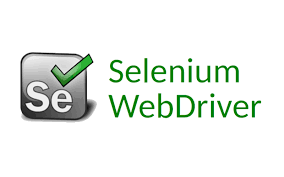

In [ ]:
# Primeros pasos con Selenium en Google Colab. Fuente: Academia https://scraping.link/ Youtube: https://youtu.be/VdwcTlQRt7w
# Ver tambien https://stackoverflow.com/questions/51046454/how-can-we-use-selenium-webdriver-in-colab-research-google-com

!dpkg --configure -a
# Instalación de dependencias
!pip install selenium -U --quiet
!apt-get update --quiet  # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver --quiet

from selenium.webdriver.common.by import By
import sys
from selenium import webdriver
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

     |████████████████████████████████| 985 kB 7.6 MB/s 
     |████████████████████████████████| 358 kB 45.5 MB/s 
     |████████████████████████████████| 139 kB 43.4 MB/s 
     |████████████████████████████████| 149 kB 56.9 MB/s 
     |████████████████████████████████| 58 kB 5.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.11 which is incompatible.
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://archive.ubunt

In [ ]:
# Configuracion
options = webdriver.ChromeOptions() # Usamos chrome, se podria usar otro.
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# Configuramos el web driver
wd = webdriver.Chrome('chromedriver',options=options)

# Hacemos el pedido a la URL
url = "https://www.wikipedia.com" 
wd.get(url)
h1 = wd.find_element(By.CSS_SELECTOR, "h1")
print(f'h1 extraido de wikipedia: \n\n{h1.text}')

h1 extraido de wikipedia: 

Wikipedia
The Free Encyclopedia


In [ ]:
# Tiempo  de espera ( si encuentra antes, no espera)
wd.implicitly_wait(20)

# Busco el boton de wikipedia en español
boton_wiki_esp = wd.find_element(By.ID, 'js-link-box-es')

# Le hago click
boton_wiki_esp.click()

hello_wiki = wd.find_element(By.ID,'Bienvenidos_a_Wikipedia,')
main_article = wd.find_element(By.ID,'main-tfa')

print(f'Texto de bienvenida:\n {hello_wiki.text}\n')
print(f'Texto del articulo destacado:\n{main_article.text}')

NoSuchElementException: ignored

In [ ]:
# El input del formulario de busqueda

search_input = wd.find_element(By.ID,'searchInput')

# El boton de busqueda
search_button = wd.find_element(By.ID,'searchButton')

# Envio el texto que quiero que ponga en el formulario
search_input.send_keys('Procesamiento del lenguaje natural')

#Hago click
search_button.click()

# Imprimo el título de la página a la que se accedió
heading = wd.find_element(By.ID,"firstHeading")
print(f'Heading: \n{heading.text}') 

Heading: 
Procesamiento de lenguajes naturales


In [ ]:
# Podemos hasta sacar un screenshot!
wd.save_screenshot("screenshot.png")

True

In [ ]:
# Imprimo el cuerpo de texto de la página a la que se accedió
parrafo = wd.find_element(By.CLASS_NAME,"mw-parser-output")
print(f'Heading: \n{parrafo.text}')

Heading: 
El procesamiento de lenguaje natural,12 abreviado PLN34 —en inglés, natural language processing, NLP— es un campo de las ciencias de la computación, de la inteligencia artificial y de la lingüística que estudia las interacciones entre las computadoras y el lenguaje humano. Se ocupa de la formulación e investigación de mecanismos eficaces computacionalmente para la comunicación entre personas y máquinas por medio del lenguaje natural, es decir, de las lenguas del mundo. No trata de la comunicación por medio de lenguas naturales de una forma abstracta, sino de diseñar mecanismos para comunicarse que sean eficaces computacionalmente —que se puedan realizar por medio de programas que ejecuten o simulen la comunicación—. Los modelos aplicados se enfocan no solo a la comprensión del lenguaje de por sí, sino a aspectos generales cognitivos humanos y a la organización de la memoria. El lenguaje natural sirve solo de medio para estudiar estos fenómenos. Hasta la década de 1980, la may

### Scroll infinito

In [ ]:
# Configuramos el web driver
driver = webdriver.Chrome('chromedriver',options=options)

# Hacemos el pedido a la URL
url = "https://infinite-scroll.com/demo/full-page/" 
driver.get(url)

# Busco todos los h2 (notar la sutileza del metodo elements en plural)
h2_list = driver.find_elements(By.CSS_SELECTOR, "h2")
for h2 in h2_list:
  print(h2.text)

1a - Infinite Scroll full page demo
1b - RGB Schemes logo in Computer Arts


In [ ]:
# Tomo un screenshot 
driver.save_screenshot(f'infinite_page.screenshot.png')

# Hago lo mismo que antes pero iterando 5 veces y pidiendole que scrollee hasta el final cada vez y saque un screenshot
for i in range(5):
  print(f'Iteracion numero {i}\n\n')
  # el metodo execute_script me permite ejecutar codigo de javascript, en este caso para ir al final de la pagina
  driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
  driver.save_screenshot(f'infinite_page_{i}.screenshot.png')
  h2_list = driver.find_elements(By.CSS_SELECTOR, "h2")
  for h2 in h2_list:
    print(h2.text)
  print('\n\n')

Iteracion numero 0


1a - Infinite Scroll full page demo
1b - RGB Schemes logo in Computer Arts
2a - RGB Schemes logo
2b - Masonry gets horizontalOrder
2c - Every vector 2016



Iteracion numero 1


1a - Infinite Scroll full page demo
1b - RGB Schemes logo in Computer Arts
2a - RGB Schemes logo
2b - Masonry gets horizontalOrder
2c - Every vector 2016
3a - Logo Pizza delivered
3b - Some CodePens
3c - 365daysofmusic.com
3d - Holograms



Iteracion numero 2


1a - Infinite Scroll full page demo
1b - RGB Schemes logo in Computer Arts
2a - RGB Schemes logo
2b - Masonry gets horizontalOrder
2c - Every vector 2016
3a - Logo Pizza delivered
3b - Some CodePens
3c - 365daysofmusic.com
3d - Holograms
4a - Huebee: 1-click color picker
4b - Word is Flickity is good



Iteracion numero 3


1a - Infinite Scroll full page demo
1b - RGB Schemes logo in Computer Arts
2a - RGB Schemes logo
2b - Masonry gets horizontalOrder
2c - Every vector 2016
3a - Logo Pizza delivered
3b - Some CodePens
3c - 365daysof

### Las posibilidades son enormes!

#### Básicamente podemos recorrer cualquier pagina web clickeando, scrolleando , completando formularios o lo que sea usando Python y con posibilidad de automatizarlo completamente.

Algunos ejemplos más:

```python
# Para ir al final de un documento: https://stackoverflow.com/questions/20986631/how-can-i-scroll-a-web-page-using-selenium-webdriver-in-python
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
```
Algunas formas de seleccionar elementos <br>
`<input type="text" name="passwd" id="passwd-id" />`

```python
# Diferentes formas de seleccionar un elemento
find_element(By.ID, "passwd-id")
find_element(By.NAME, "passwd")
find_element(By.XPATH, "//input[@id='passwd-id']")
find_element(By.CSS_SELECTOR, "input#passwd-id")

# Y hay más!!
find_element(By.LINK_TEXT, "link text")
find_element(By.PARTIAL_LINK_TEXT, "partial link text")
find_element(By.TAG_NAME, "tag name")
find_element(By.CLASS_NAME, "class name")
```

# **Ideas? Sugerencias? Algo para charlar?**

<img src='https://chandigarhx.com/wp-content/uploads/2017/04/coffee-ideas.jpg'>